In [3]:
# libraries
import pandas as pd
import numpy as np

# Box-Cox Transformation
from scipy import stats

# min max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# random seed
np.random.seed(0)

## Scaling vs Normalization
The two terms, scaling and normalization are similar. They are often used interchangeably. The point is we are actually transforming the values of numeric variables so that the transformed data points have specific helpful properties. But in their similarities, there is a principal difference between them:
* in scaling, we're changing the range of our data.
* in normalization, we're changing the shape of the distribution of our data.
#### Scaling
This means that we're transforming our data so that it fits within a specific scale, like 0-100 or 0-1. We want to scale data when we're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, we might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if we don't scale our prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as difference of 1 US Dollar. This clearly does not fit with our intuitions of the world. With currency, we can convert between currencies. But what about if we're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal to one meter). 

By scaling our variables, we can help compare different variables on equal footing. To help solidify what scaling looks like.

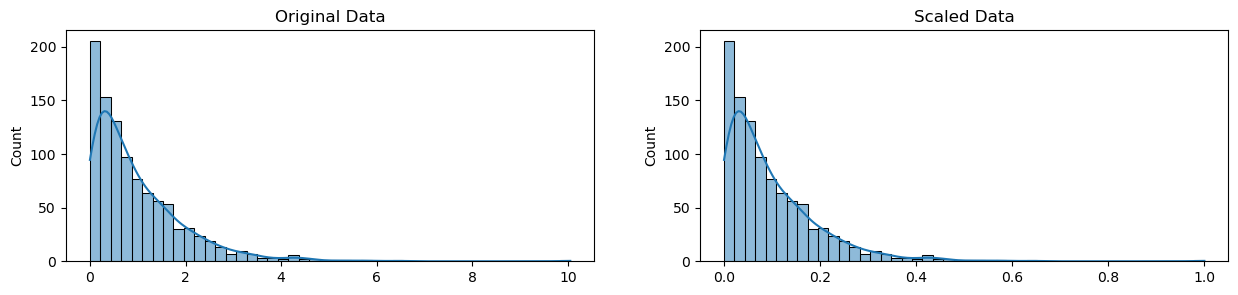

In [9]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled Data")
plt.show()

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

#### Normalization
Scaling changes the range of our data. On the other hand, the point of normalization is to change our observations so that they can be described as a normal distribution. 

**Normal Distribution**, also known as "bell curve", is a specific statistical distribution where roughly equal observations fall
above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as **_Gaussian distribution_**.

In General, we'll normalize our data if we are going to be using machine learning or statistics technique that assumes our data is normally distributed. Some examples of this include _linear discriminant analysis_ (SDA) and _Gaussian Naive Bayes_. (**Pro tip**: any method with "Gaussian" in the name probably assumes normality.) 

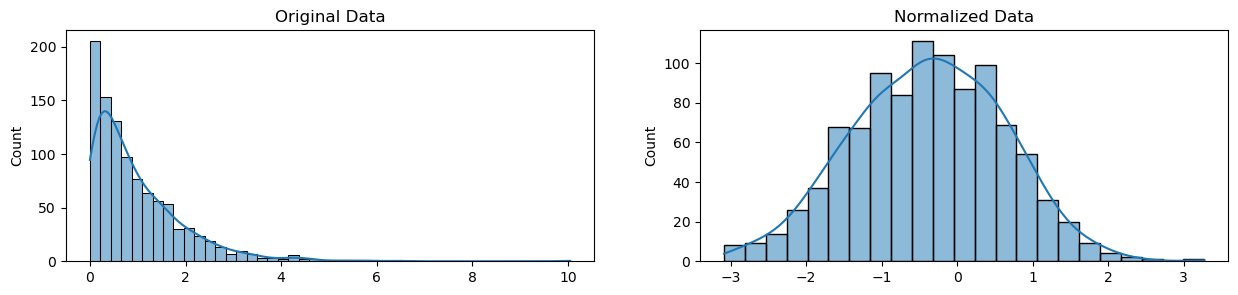

In [11]:
# normalize the exponential data with box-cox
normalized_data = stats.boxcox(original_data)

# Plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized Data")
plt.show()